<a href="https://colab.research.google.com/github/statistics-jun/2022-1-ESAA/blob/main/ESAA_Week13_CNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2022-1 ESAA 5기 김혜준 개념 필사 - 0603(금) 13주차 과제
## <파이썬 딥러닝 텐서플로>
## PART 04 합성곱 신경망(CNN)

### 01 합성곱 신경망
* 합성곱 신경망(CNN : Convolution Neural Network) : 데이터가 가진 특징들의 패턴을 학습하는 알고리즘, 컴퓨터 비전 분야에서 많이 사용
  - 이미지 분류 : 이미지의 특징을 추출해 이미지를 인식할 수 있는 능력을 갖춘 기술
  - 객체 탐지 : 이미지에서 특정한 객체를 인식하고 이미지의 어디에 있는지 위치(경계 박스 - 회귀분석 이용)까지 파악하는 기술, 인식한 객체가 어떤 클래스에 속하는지 분류 확률과 예측(분류 이용)을 함께 제공
  - 스타일 전이 : 콘텐츠 이미지와 스타일 참조 이미지를 이용해 콘텐츠의 기본 형태를 유지하고 스타일을 입혀서 새로운 이미지를 생성하는 기술


#### 1-1 이미지 표현
* 이미지(영상)를 컴퓨터가 이해할 수 있게 하려면 숫자로 표현
* 흑백 이미지 : 0(검은색)~255(흰색) 사이의 숫자로 각 픽셀의 화소 값을 나타내는 방식으로 표현
* 컬러 이미지 : R(빨강), G(초록), B(파랑) 채널로 구성된 3장의 이미지를 겹쳐서 표현, 각 채널은 0~255 사이의 숫자로 나타내며, 숫자가 클수록 해당 색상을 더 강하게 표현


#### 1-2 합성곱(Convolution)
* 합성곱 연산 : 일반적으로 정방형 크기를 가지는 커널(kernel 또는 filter)을 사용하여 입력 이미지에 대한 특성을 추출하는 방법
* 특성맵(feature map) : 합성곱 연산을 통해서 추출된 이미지, 딥러닝 모델 학습에 사용시 성능 향상

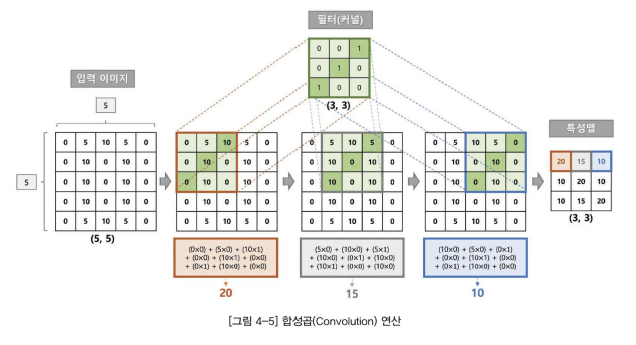

* 입력 이미지의 크기 : (세로, 가로) 순서로 shape 출력
* 입력 이미지의 좌측 상단부터 커널과 같은 크기를 갖도록 입력 이미지의 일부분에 커널이 겹치도록 투영

  -> 입력 이미지와 커널이 겹치는 부분에 대하여 합성곱 연산 수행(element-wise 곱셈 연산 후 모두 더한 단일 스칼라 값 도출)
  
  -> feature map의 값으로 입력
* 오차 역전파(back propagation) 시 커널의 가중치 업데이트
* 커널의 공유 가중치(shared weights)로 인해 합성곱 신경망은 이미지 특성 추출에 효율적
* 완전 연결층을 사용할 때보다 연산량이 훨씬 적다는 장점

#### 1-3 채널(channel)
* 채널 : 입력 이미지를 구성하는 2차원 배열의 개수
  - 흑백 이미지 : 단일 채널
  - 컬러 이미지 : 다중 채널(R, G, B 3개의 채널)


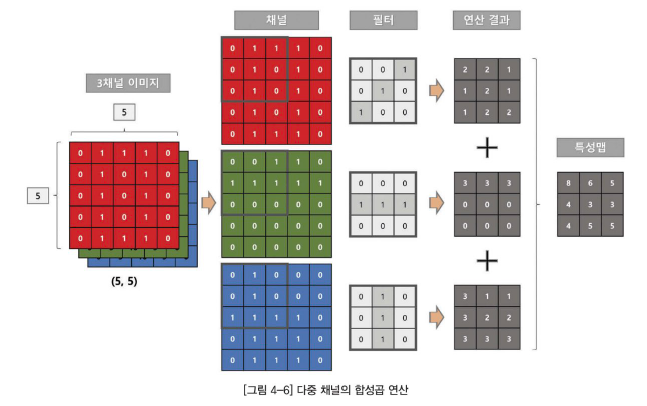

* 입력 이미지의 채널 개수만큼 커널이 생성

  -> 각 채널마다 하나씩 커널을 적용하여 합성곱 연산 수행

  -> 입력 이미지의 채널 개수만큼 생성된 합성곱 연산 결과를 element-wise 덧셈 연산으로 모두 더하여 최종 특성맵 생성

#### 1-4 스트라이드(stride)
* 스트라이드 : 커널이 합성곱 연산을 수행할 때 이동하는 간격, 주로 1 또는 2로 설정
* 텐서플로 케라스의 `Conv2D` 레이어의 `strides` 매개변수로 지정

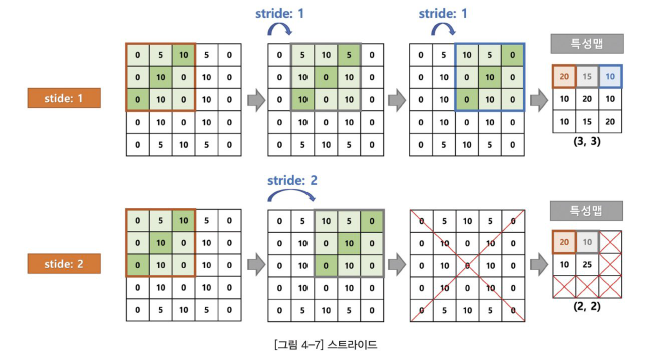

#### 1-5 패딩(padding)
* 패딩 : 추출된 특성맵의 크기가 입력 이미지 대비 줄어들지 않도록 설정
* 일반적으로 zero-padding을 사용하여 입력 이미지의 가장 자리에 0으로 채워진 패딩 값을 채운 후 추출
* 텐서플로 케라스의 `Conv2D` 레이어에서 `padding='same'`으로 설정하여 zero-padding 적용
(기본값은 `padding='valid'`)

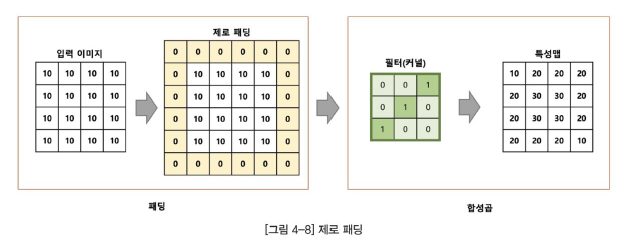

#### 1-6 특성맵(feature map) 사이즈
* 출력 데이터의 크기를 구하는 식

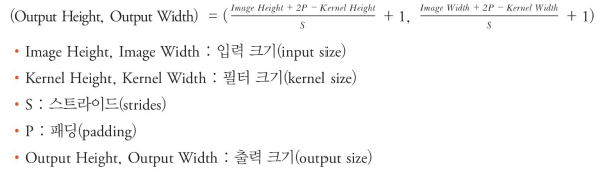

#### 1-7 풀링(pooling)
* 풀링 : 추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어, 스트라이드 값을 가짐
  - 최대 풀링(max pooling) : 최대값이 출력 값으로 선택, 성능이 좋아 CNN과 같이 주로 사용
  - 평균 풀링(average pooling) : 평균 값이 출력 값으로 도출
* 풀링 레이어 사용의 이점 : 이미지 축소를 통해 연산량을 감소, 과대적합 방지

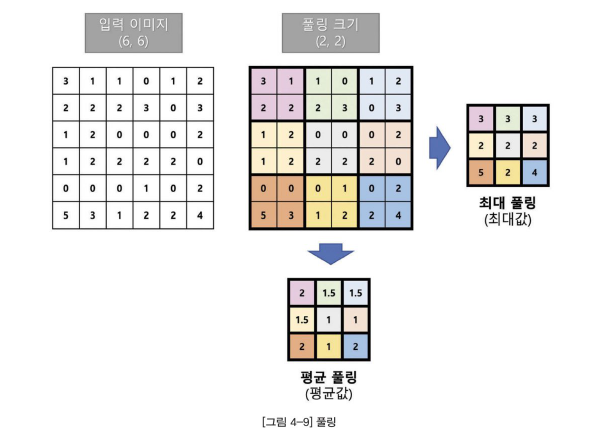

### 02 간단한 모델 생성
* mnist 손글씨 데이터셋 사용

#### 2-1 데이터 로드 및 전처리

In [1]:
# tensorflow 모듈 import 
import tensorflow as tf

In [2]:
# mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_valid, y_valid) = mnist.load_data() # 훈련 셋과 검증 셋으로 구분해서 튜플 형태로 정리

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


> 훈련 셋 : 60000개
>
> 검증 셋 : 10000개
> 
> 가로, 세로 각각 28픽셀인 손글씨 이미지와 손글씨가 나타내는 숫자 레이블(정답)이 매칭

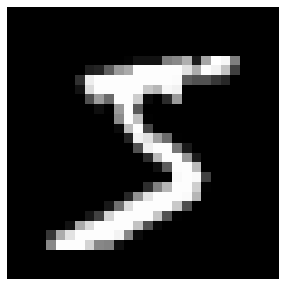

In [3]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx], cmap="gray")
    plt.axis("off")
    plt.show()

plot_image(x_train, 0) # 훈련 셋의 첫 번째 이미지(인덱스 0) 출력

In [4]:
# 훈련 셋과 검증 셋의 이미지 픽셀을 나타내는 값의 최소값, 최대값 출력
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


> 이미지 픽셀이 0~255 범위의 숫자로 구성

In [5]:
# 정규화(Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


> 이미지 픽셀 값을 최대값 255로 나누어 0~1 범위로 정규화

* mnist 데이터셋 : 색상을 나타내는 채널이 1개인 모노 컬러 이미지로 구성

  -> CNN 모델에 주입하기 위해 색상을 나타내는 채널 추가

In [6]:
# 채널 추가
print(x_train.shape, x_valid.shape)

# tf.newaxis 축을 텐서 배열에 직접 추가하는 방식 사용
# [] 안에서 채널을 추가하고자 하는 위치에 tf.newaxis 작성
x_train_in = x_train[..., tf.newaxis] # 가장 마지막 축에 채널 추가
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


#### 2-2 Sequential API로 모델 생성 및 학습

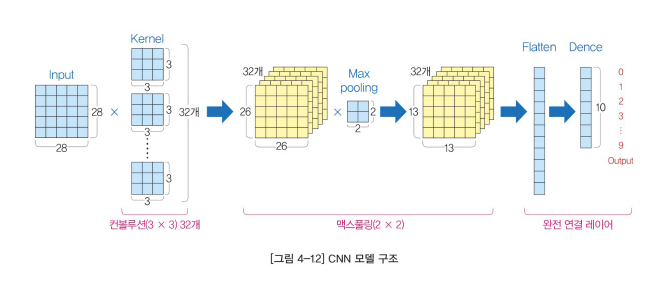

* Sequential API를 사용하여 합성곱 레이어 1개, 풀링 레이어 1개를 적용하는 간단한 모델 생성
  - 합성곱은 Conv2D 레이어를 사용, (3, 3) 크기의 서로 다른 32가지 커널 적용, 활성화 함수는 ReLU, name 속성에 레이어 이름을 'conv'로 지정
  - 풀링 레이어는 (2,2) 크기로 최대 풀링 적용, 레이어 이름 속성 추가
  - 최종 분류기로 Dense 레이어를 적용하기 위해 Flatten 층을 추가하여 1차원 배열로 펼쳐줌
  - 최종 분류기는 정답 레이블이 0~9까지 10개의 값을 가지므로 노드 개수를 10으로 설정, 분류 클래스가 10개인 다중 분류 문제이므로 활성화 함수로 softmax 적용

In [7]:
# Sequential API를 사용해 샘플 모델 생성
model = tf.keras.Sequential([
    # Convolution 적용 (32 filters)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', 
                           input_shape=(28, 28, 1), name='conv'),
    # Max Pooling 적용
    tf.keras.layers.MaxPooling2D((2, 2), name='pool'),
    # Classifier 출력층 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [8]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # 모델 인스턴스 생성

# 모델 훈련
history = model.fit(x_train_in, y_train, # 훈련 셋
                    validation_data=(x_valid_in, y_valid), # 검증 셋 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2289 - accuracy: 0.9349 - val_loss: 0.0894 - val_accuracy: 0.9744
Epoch 2/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0841 - accuracy: 0.9754 - val_loss: 0.0619 - val_accuracy: 0.9805
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0623 - accuracy: 0.9818 - val_loss: 0.0614 - val_accuracy: 0.9799
Epoch 4/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0520 - accuracy: 0.9846 - val_loss: 0.0591 - val_accuracy: 0.9812
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0444 - accuracy: 0.9869 - val_loss: 0.0548 - val_accuracy: 0.9830
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0369 - accuracy: 0.9889 - val_loss: 0.0548 - val_accuracy: 0.9824
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0320 - accuracy: 0.9901 - val_loss: 0.0667 -

> 모델이 학습하면서 epoch당 손실과 평가 결과 출력
>
> 두 번째 epoch를 마친 상태에서도 훈련 셋과 검증 셋 모두 97%에 가까운 정확도를 보임

In [9]:
model.evaluate(x_valid_in, y_valid) # 모델의 학습된 가중치를 사용하여 손실과 평가지표 계산

313/313 [==============================] - 2s 6ms/step - loss: 0.0550 - accuracy: 0.9845


[0.05495063588023186, 0.984499990940094]

> 검증 셋에 대해서 약 98%의 정확도

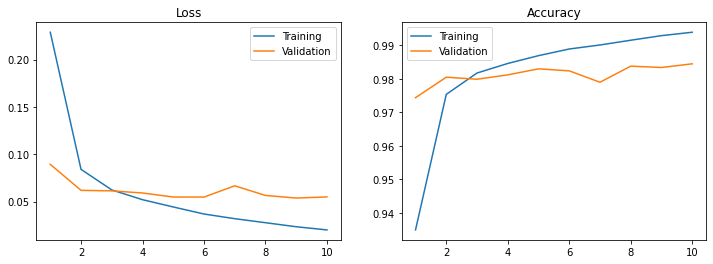

In [10]:
# 모델의 예측 오차와 정확도를 그래프로 그리는 함수 정의
def plot_loss_acc(history, epoch):
    '''
    history : 모델 훈련 결과를 저장한 객체
    epoch : 앞서 훈련 시 지정한 epoch 수
    '''
    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].plot(range(1, epoch + 1), loss, label='Training')
    axes[0].plot(range(1, epoch + 1), val_loss, label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch + 1), acc, label='Training')
    axes[1].plot(range(1, epoch + 1), val_acc, label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

    plt.show()

plot_loss_acc(history, 10)

> 훈련 셋에 대한 손실은 계속 줄어듦
>
> 검증 셋에 대한 손실은 어느 수준에서 더 이상 낮아지지 않음 -> 4 epoch 이후부터는 모델이 과대적합으로 진행

#### 2-3 모델 구조 파악

* `summary()` : 각 레이어의 이름과 출력 텐서의 형태, 각 레이어를 구성하는 파라미터(가중치 개수)

In [11]:
# 모델 구조 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


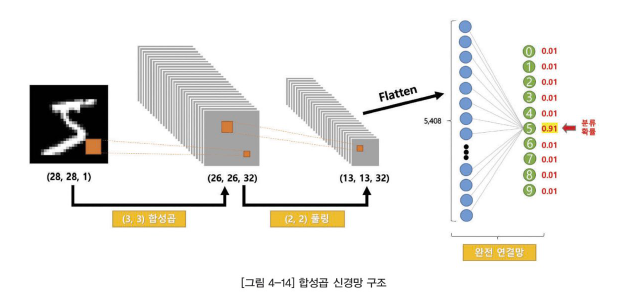

* (28, 28, 1) 형태의 입력 텐서가 Conv2D를 거치고 (26, 26, 32) 형태로 변환
  - (3, 3) 크기의 합성곱 필터 사용 -> 이미지 가로, 세로 크기가 2씩 줄어듦 (여기서 패딩은 적용하지 않음)
  - 서로 다른 32개의 필터 적용 -> (26, 26) 크기의 특성맵이 32개 생성

  => 32가지 종류의 피처 추출
* 풀링 레이어를 거치면 (13, 13, 32) 텐서로 변환
  - (2, 2) 크기의 풀링 레이어를 적용했기 때문에 이미지 크기가 $\frac{1}{2}$로 줄어듦
* Flatten 층에서 3차원 벡터를 1차원 텐서로 펼치면 5408개(13 * 13 * 32) 원소를 갖는 1차원 벡터
* 출력 노드 10개인 Dense 레이어로 보내 최종 분류 값 예측해 출력

In [12]:
# 입력 텐서 형태 
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

> 입력 텐서 : (None, 28, 28, 1)
>  
> -> 가장 앞에 있는 축(axis = 0)의 None 값은 배치 크기가 들어오는 위치로서 배치 크기로 어떤 값이든 가능하다는 의미

In [13]:
# 출력 텐서 형태 
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

> 출력 텐서 : (None, 10)
>
> -> 10개의 노드를 갖는 1차원 벡터 형태

In [14]:
# 레이어 
model.layers # 파이썬 리스트 형태로 레이어 객체를 담아서 보여줌

> 모델은 4개의 레이어로 구성

In [15]:
# 첫 번째 레이어 선택
model.layers[0]

In [16]:
# 첫 번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

> 첫 번째 레이어의 입력 : 모델의 입력 데이터가 그대로 들어가기 때문에 (None, 28, 28, 1) 형태

In [17]:
# 첫 번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

> 첫 번째 레이어의 출력 : Conv2D 레이어를 거치면 픽셀 사이즈가 2씩 줄어들고 채널 개수가 32개로 늘어나면서 (None, 26, 26, 32) 형태

In [18]:
# 첫 번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 0.03026265, -0.05714832,  0.29058427, -0.01786881,
           -0.09984851, -0.7581895 , -0.63103706, -0.01377332,
            0.04977672,  0.24514614, -0.17099863, -0.90286   ,
            0.20350435,  1.0189469 , -0.918937  ,  0.23657392,
           -0.42376623,  0.25357038, -0.5170971 , -0.42507926,
            0.11310414,  0.33609858, -1.4403734 ,  0.47435313,
            0.16666117,  0.52819383, -0.95882356,  0.45393756,
           -0.62429965,  0.43817148,  0.20437145, -0.2733552 ]],
 
         [[ 0.4077187 , -0.06576092, -0.322824  ,  0.31601366,
            0.06050316,  0.33020884, -0.29129001,  0.1906109 ,
           -0.16103013,  0.46002188, -0.6899226 , -0.4398276 ,
            0.19463055, -1.0238441 ,  0.18363707,  0.5686104 ,
           -0.2796864 ,  0.25105345, -0.7980207 , -0.11481271,
           -0.23535363,  0.24739343, -0.9196014 , -0.03855397,
            0.06609483, -0.10322007, -0.43

* 텐서플로 변수(tf.Variable) : 가중치와 같이 모델 학습 과정에 값이 업데이트되는 경우 사용

> 2개의 텐서플로 변수 행렬
  - 첫 번째 변수('conv/kernel:0') : 커널(합성곱 필터) 행렬의 가중치
    - shape=(3, 3, 1, 32) : (3, 3)은 필터의 크기, (1)은 입력층의 채널 개수, (32)는 출력층의 채널 개수
    - layer[0] 커널의 학습 가능한 파라미터 수 = 3 * 3 * 1 * 32 = 288개
  - 두 번째 변수('conv/bias:0') : 각 커널의 상수항(bias)
    - shape=(32,) : 출력층의 채널 수
  - layer[0]의 총 학습 가능한 파라미터 수 = 288 + 32 = 320개

In [19]:
# 첫 번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 0.03026265, -0.05714832,  0.29058427, -0.01786881,
          -0.09984851, -0.7581895 , -0.63103706, -0.01377332,
           0.04977672,  0.24514614, -0.17099863, -0.90286   ,
           0.20350435,  1.0189469 , -0.918937  ,  0.23657392,
          -0.42376623,  0.25357038, -0.5170971 , -0.42507926,
           0.11310414,  0.33609858, -1.4403734 ,  0.47435313,
           0.16666117,  0.52819383, -0.95882356,  0.45393756,
          -0.62429965,  0.43817148,  0.20437145, -0.2733552 ]],

        [[ 0.4077187 , -0.06576092, -0.322824  ,  0.31601366,
           0.06050316,  0.33020884, -0.29129001,  0.1906109 ,
          -0.16103013,  0.46002188, -0.6899226 , -0.4398276 ,
           0.19463055, -1.0238441 ,  0.18363707,  0.5686104 ,
          -0.2796864 ,  0.25105345, -0.7980207 , -0.11481271,
          -0.23535363,  0.24739343, -0.9196014 , -0.03855397,
           0.06609483, -0.10322007, -0.43745074,  0.149417

In [20]:
# 첫 번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-2.55909652e-01, -7.58540351e-03, -4.06973213e-02, -2.50698358e-01,
       -2.25049078e-01, -4.52195741e-02, -1.06551565e-01, -3.60269636e-01,
       -2.32789859e-01, -2.47600332e-01,  1.02742285e-01, -6.99445531e-02,
       -2.56690592e-01,  5.52327074e-02, -1.93220094e-01, -3.03706825e-01,
       -1.95868891e-02, -1.50414929e-01, -5.23511395e-02, -3.42832595e-01,
       -2.23716468e-01, -3.49618018e-01,  1.35289580e-01, -1.87060937e-01,
       -3.18598479e-01, -5.07744253e-01, -1.09244563e-01, -2.33629569e-01,
        1.85751577e-03, -1.86836682e-04, -2.97168732e-01, -9.61758345e-02],
      dtype=float32)>

In [21]:
# 레이어 이름(name 속성) 사용하여 레이어 선택
model.get_layer('conv')

In [22]:
# 샘플 이미지의 레이어별 출력을 리스트에 추가(첫 번째, 두 번째 레이어)
activator = tf.keras.Model(inputs=model.input, # 입력 데이터
                           outputs=[layer.output for layer in model.layers[:2]]) # 첫 번째와 두 번째 레이어의 출력을 최종 출력으로 가짐
activations = activator.predict(x_train_in[0][tf.newaxis, ...]) # 첫 번째 샘플에 대하여 각 레이어의 출력 예측

len(activations)

2

> 2개의 출력 텐서

In [23]:
# 첫 번째 레이어(conv) 출력층 
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

> 첫 번째 텐서 : Conv2D 레이어의 출력
  - (1, 26, 26, 32) 형태 : 1은 입력 이미지의 개수, 즉 샘플이 1개

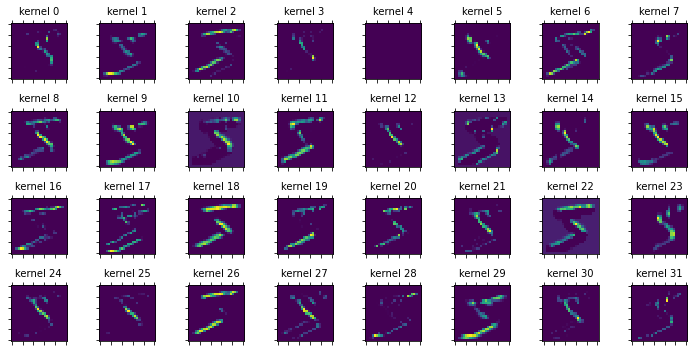

In [24]:
# Convolution 시각화
# 첫 번째 레이어에서 출력되는 특성맵 이미지를 32개 커널별로 구분하여 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

> 출력 이미지의 특징이 조금씩 차이가 있음
>
> -> 각 커널은 입력 이미지로부터 서로 다른 피처를 추출

In [25]:
# 두 번째 레이어(pool) 출력층 
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


> 두 번째 텐서 : 최대 풀링 레이어의 출력
  - (1, 13, 13, 32) 형태

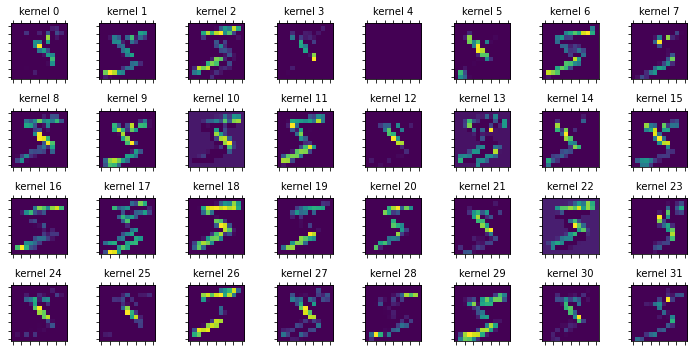

In [26]:
# 시각화
# 각 커널별로 출력되는 특성맵 이미지 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

> Conv2D 출력 이미지에 비하여 화소 크기가 굵어짐
>
>-> 최대 풀링은 인근 픽셀들을 모아서 최대값으로 고정하기 때문에 픽셀 수는 줄이면서 특징을 더욱 강하게 드러냄

### 03 복잡한 모델 생성
* 텐서플로 케라스의 Functional API를 사용

#### 3-1 데이터셋 준비

In [27]:
import tensorflow as tf
import numpy as np

In [28]:
# mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


* 원본 mnist 데이터셋은 0~9까지 숫자를 손글씨로 쓴 이미지(x)와 정답(y) 숫자로 구성

  -> 홀수/짝수를 판단하는 정답(y_odd)를 추가

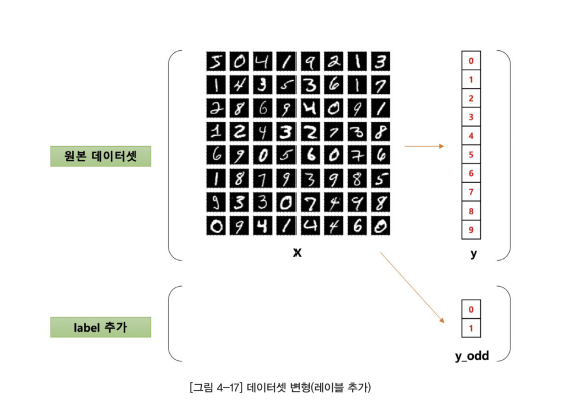

In [29]:
# 새로운 출력값 배열을 생성(홀수: 1, 짝수: 0)
y_train_odd = []
for y in y_train:
    if y % 2==0:
        y_train_odd.append(0)
    else:
        y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [30]:
# 원본 y_train 배열과 홀짝으로 분류한 y_train_odd 배열을 동시에 출력하여 비교
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


> 홀짝 여부가 잘 정리됨

In [31]:
# Validation 데이터셋 처리
y_valid_odd = []
for y in y_valid:
    if y % 2==0:
        y_valid_odd.append(0)
    else:
        y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [32]:
# 정규화(Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

# 채널 추가
# 색상이 하나인 모노 컬러 이미지이므로, 새로운 축을 추가하고 채널 개수를 1개로 지정
# 텐서플로 expand_dims() 함수에 원본 배열을 입력하고, 새롭게 추가하려는 축의 인덱스를 지정하여 해당 인덱스에 새로운 축 추가
x_train_in = tf.expand_dims(x_train, -1) # 축의 인덱스로 -1을 지정하여 새로운 축을 끝에 추가
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


#### 3-2 Functional API로 다중 입력, 다중 출력 레이어 생성
* 함수의 입력과 출력으로 표현 가능해 자유롭게 모델 구조를 정의할 수 있다는 장점

* 입력 레이어 inputs는 Conv2D 레이어와 Flatten 레이어의 입력으로 사용
  
  -> 입력 레이어는 2개의 출력을 가짐
  
  -> 서로 다른 2개의 출력은 각각 다른 레이어의 입력으로 사용
  
  -> 최종적으로 Concatenate 레이어에서 합쳐진 다음 Dense 레이어를 통과



In [33]:
# Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28, 28, 1))

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation='softmax')(concat)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 32)   320         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 flatten_1 (Flatten)            (None, 5408)         0           ['max_pooling2d[0][0]']          
                                                                                            

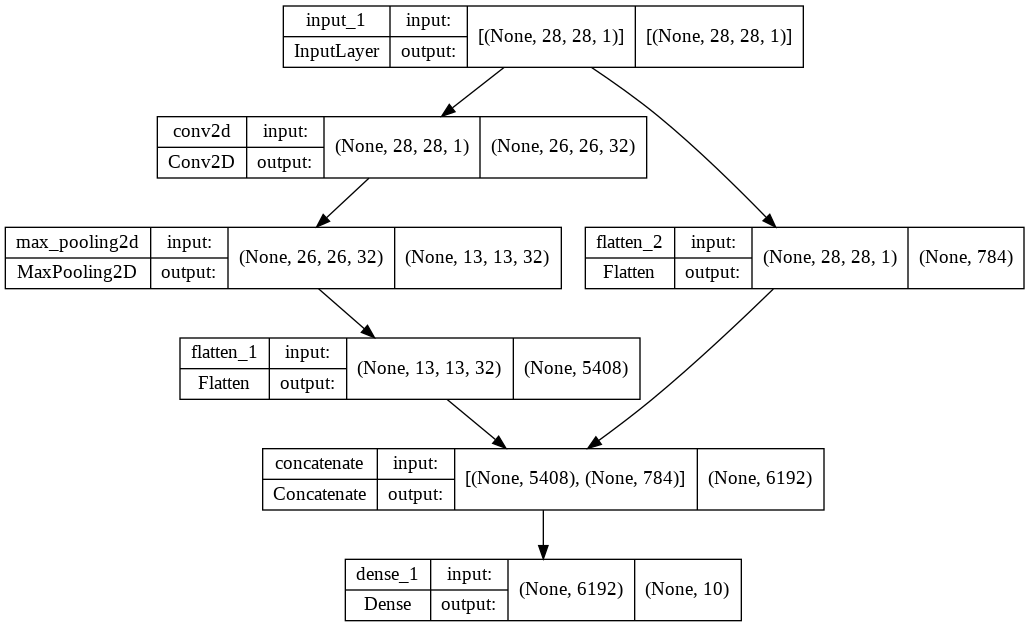

In [34]:
# 모델 구조 출력 및 이미지 파일로 저장
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='/content/drive/MyDrive/ESAA/2022-1/과제/개념 필사/0603(금) 13주차 과제_합성곱(1)/functional_cnn.png')

> 입력 레이어가 두 개의 층으로 나누어 지고, 마지막 Dense 레이어를 통과하기 전에 Concatenate 레이어에서 하나로 합쳐지는 구조

In [35]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

# 모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1983 - accuracy: 0.9449 - val_loss: 0.0822 - val_accuracy: 0.9757
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0763 - accuracy: 0.9774 - val_loss: 0.0664 - val_accuracy: 0.9794
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0588 - accuracy: 0.9819 - val_loss: 0.0617 - val_accuracy: 0.9801
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0475 - accuracy: 0.9858 - val_loss: 0.0578 - val_accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0402 - accuracy: 0.9876 - val_loss: 0.0563 - val_accuracy: 0.9826
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0334 - accuracy: 0.9898 - val_loss: 0.0590 - val_accuracy: 0.9820
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0287 - accuracy: 0.9908 - val_loss: 0.0575 -

> 10개의 숫자 레이블을 맞추는 모델의 정확도 : 약 98% (Sequential 모델과 큰 차이 없음)

#### 3-3 다중 출력 분류 모델

* 두 가지 서로 다른 분류 문제를 동시에 예측하는 다중 출력 분류 모델 생성
  - 0~9까지 숫자를 맞추는 분류 문제
  - 홀수, 짝수 분류 문제

  -> 최종 분류기의 출력 레이어를 2개 만드는 것이 핵심

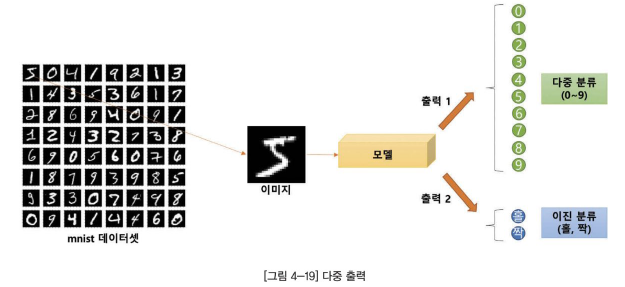

In [36]:
# Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28, 28, 1), name='inputs')

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2), name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_layer (Conv2D)          (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 maxpool_layer (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d_layer[0][0]']           
                                                                                                  
 flatten_layer (Flatten)        (None, 5408)         0           ['maxpool_layer[0][0]']          
                                                                                            

In [37]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


> 입력은 하나, 출력은 10개인 텐서와 1개인 텐서 두 개

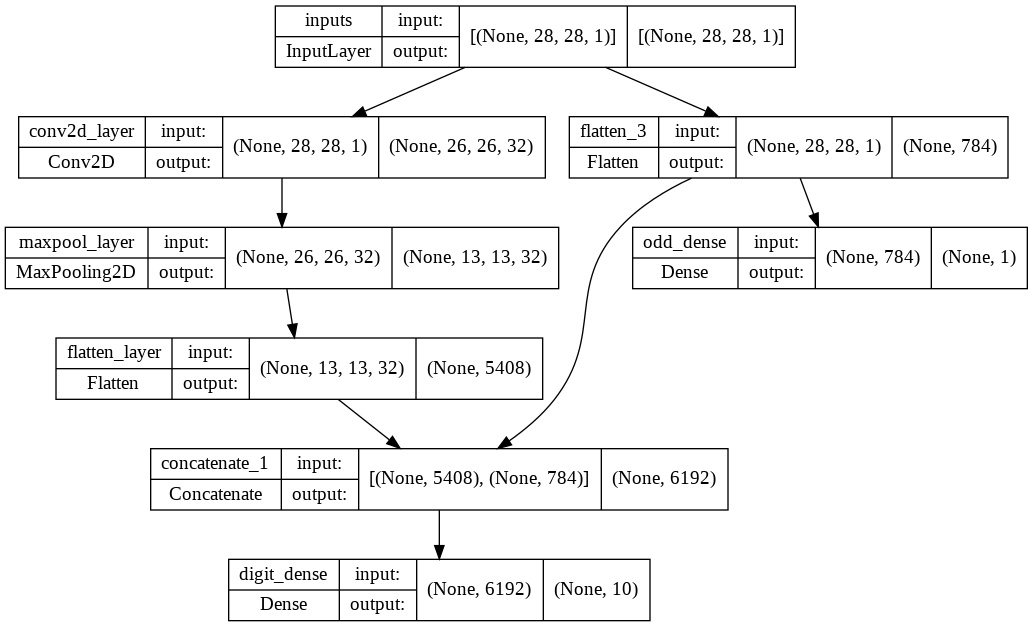

In [38]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='/content/drive/MyDrive/ESAA/2022-1/과제/개념 필사/0603(금) 13주차 과제_합성곱(1)/multi_output_cnn.png')

* 모델 컴파일 시 주의할 점
  - 모델 정의 시 각각의 출력 Dense 레이어에 name 속성으로 지정한 이름을 key로 하고, 해당 key에 해당하는 레이어에 적용할 손실함수와 가중치를 딕셔너리 형태로 지정
* 모델 훈련 시 fit() 메소드를 적용할 때도 출력 값을 2개 지정하고 레이어 이름 속성을 key로 하는 딕셔너리 형태로 각각의 출력에 맞는 정답 배열 입력, 검증 데이터셋에 대해서도 구분하여 지정

In [39]:
# 모델 컴파일
model.compile(optimizer='adam', 
              loss={'digit_dense': 'sparse_categorical_crossentropy', 'odd_dense': 'binary_crossentropy'}, 
              loss_weights={'digit_dense': 1, 'odd_dense': 0.5},
              # loss = 1.0 *sparse_categorical_crossentropy + 0.5*binary_crossentropy
              metrics=['accuracy'])

# 모델 훈련
history = model.fit({'inputs': x_train_in}, {'digit_dense': y_train, 'odd_dense': y_train_odd}, 
                    validation_data=({'inputs': x_valid_in},  {'digit_dense': y_valid, 'odd_dense': y_valid_odd}), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3604 - digit_dense_loss: 0.1983 - odd_dense_loss: 0.3241 - digit_dense_accuracy: 0.9442 - odd_dense_accuracy: 0.8647 - val_loss: 0.2208 - val_digit_dense_loss: 0.0834 - val_odd_dense_loss: 0.2749 - val_digit_dense_accuracy: 0.9743 - val_odd_dense_accuracy: 0.8885
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2140 - digit_dense_loss: 0.0779 - odd_dense_loss: 0.2722 - digit_dense_accuracy: 0.9770 - odd_dense_accuracy: 0.8913 - val_loss: 0.1927 - val_digit_dense_loss: 0.0605 - val_odd_dense_loss: 0.2644 - val_digit_dense_accuracy: 0.9818 - val_odd_dense_accuracy: 0.8929
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1917 - digit_dense_loss: 0.0602 - odd_dense_loss: 0.2631 - digit_dense_accuracy: 0.9820 - odd_dense_accuracy: 0.8953 - val_loss: 0.2039 - val_digit_dense_loss: 0.0730 - val_odd_dense_loss: 0.2617 - val_digit_dense_accuracy: 0.9773 -

In [40]:
# 모델 성능
model.evaluate({'inputs': x_valid_in}, {'digit_dense': y_valid, 'odd_dense': y_valid_odd})

313/313 [==============================] - 2s 7ms/step - loss: 0.1870 - digit_dense_loss: 0.0585 - odd_dense_loss: 0.2570 - digit_dense_accuracy: 0.9835 - odd_dense_accuracy: 0.8997


[0.18700960278511047,
 0.05849914625287056,
 0.2570209205150604,
 0.9835000038146973,
 0.8996999859809875]

> 숫자를 맞추는 문제 : 98%의 정확도
>
> 홀수 여부를 판단하는 문제 : 약 90%의 정확도

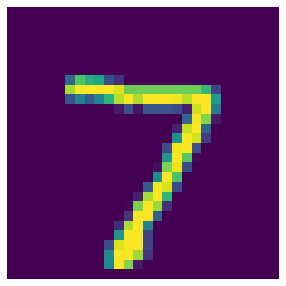

In [41]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx])
    plt.axis("off")
    plt.show()

plot_image(x_valid, 0) # 검증 데이터셋의 인덱스 0에 해당하는 이미지 출력

In [42]:
# 검증 데이터셋의 모든 이미지 데이터를 입력하여 2개의 분류 문제에 대한 예측 확률 계산
digit_preds, odd_preds = model.predict(x_valid_in)
# 숫자 7 이미지에 대한 예측 확률 출력
print(digit_preds[0])
print(odd_preds[0])

[1.9209530e-12 3.6022012e-11 4.5918411e-09 2.6202340e-06 3.2127109e-12
 7.5268085e-13 3.5225591e-21 9.9999738e-01 1.6090341e-09 1.1176709e-08]
[0.99958324]


> digit_preds : 10개의 분류 레이블에 대한 확률
>
> odd_preds : 홀수일 확률

In [43]:
digit_labels = np.argmax(digit_preds, axis=-1) # 넘파이 argmax 함수를 이용하여 예측 확률을 실제 정답 레이블로 변환
digit_labels[0:10] # 검증 데이터셋의 첫 10개 이미지에 대한 예측 레이블 확인

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

> 첫 번째 이미지를 7로 예측

In [44]:
# 홀수, 짝수 여부에 대한 예측 레이블 출력
odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1, -1)[0] # 임계값으로 0.5를 지정하여 홀수일 확률이 0.5보다 큰 경우 홀수로 분류
odd_labels[0:10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

> 첫 번째 이미지 7에 대하여 홀수(1)로 잘 분류
>
> 두 번째 이미지 2에 대하여 짝수(0)로 정확하게 분류

#### 3-4 전이 학습(Transfer Learning)
* 전이 학습 : 기본에 학습된 모델을 활용해 새로운 모델을 만들어 내는 개념

  -> 훈련한 모델의 일부를 가져와서 그대로 사용하고 최종 출력층만 새롭게 추가하여 모델 재구성 가능

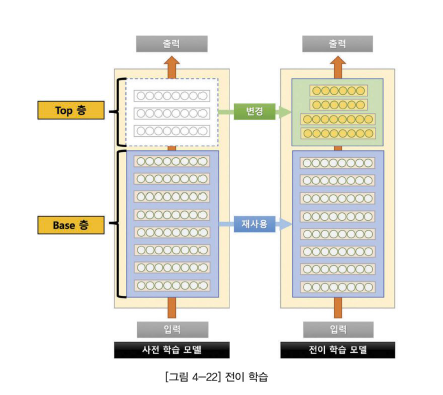

In [45]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base') # 입력 레이어부터 'flatten_layer'라는 name 속성을 갖는 Flatten 층까지 추출한 객체
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


> (28, 28, 1) 이미지를 받아서 5408개의 피처로 특징을 추출해 출력하는 모델

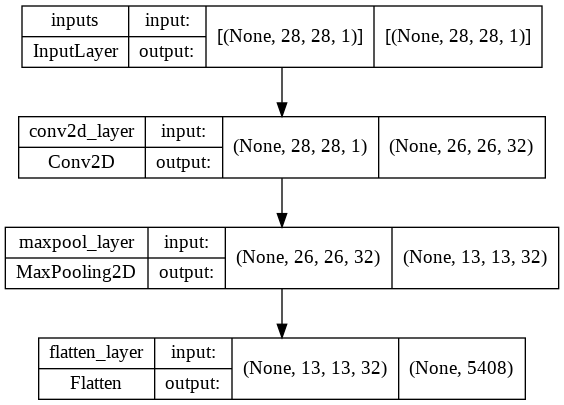

In [46]:
plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='/content/drive/MyDrive/ESAA/2022-1/과제/개념 필사/0603(금) 13주차 과제_합성곱(1)/base_model.png')

In [47]:
# Sequential API 적용
digit_model = tf.keras.Sequential([
                                   base_model,
                                   tf.keras.layers.Dense(10, activation='softmax'), # 최종 분류기 역할
                                   ])
digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


> 총 파라미터 개수 : 54410개
>
> -> 모두 훈련 가능(모델 훈련 시 파라미터 값이 업데이트됨)

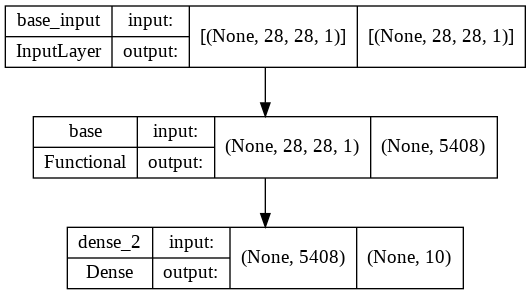

In [48]:
plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='/content/drive/MyDrive/ESAA/2022-1/과제/개념 필사/0603(금) 13주차 과제_합성곱(1)/digit_model.png')

> 최종적으로 노드 10개를 가진 분류기 역할을 하는 Dense 레이어가 추가됨

In [49]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# 모델 훈련
history = digit_model.fit(x_train_in, y_train, 
                          validation_data=(x_valid_in, y_valid), 
                          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1301 - accuracy: 0.9631 - val_loss: 0.0665 - val_accuracy: 0.9784
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0588 - accuracy: 0.9819 - val_loss: 0.0634 - val_accuracy: 0.9798
Epoch 3/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0443 - accuracy: 0.9865 - val_loss: 0.0491 - val_accuracy: 0.9842
Epoch 4/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0352 - accuracy: 0.9893 - val_loss: 0.0518 - val_accuracy: 0.9825
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0286 - accuracy: 0.9911 - val_loss: 0.0530 - val_accuracy: 0.9835
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0236 - accuracy: 0.9929 - val_loss: 0.0517 - val_accuracy: 0.9841
Epoch 7/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0189 - accuracy: 0.9942 - val_loss: 0.0549 -

> 약 98.3%의 정확도

In [50]:
# 베이스 모델의 가중치를 고정(Freeze Model)

base_model_frozen = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable = False # 모델의 파라미터 값이 고정되어 훈련을 통해서 업데이트되지 않음
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


> 훈련 가능한 파라미터 개수가 0으로 확인

In [51]:
# Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs=base_model_frozen.input,
                                           outputs=dense_output)
digit_model_frozen.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

> 총 파라미터 개수 : 54410개
>
> -> 앞서 고정한 320개의 파라미터는 훈련 불가능
>
> -> Flatten 레이어의 출력 5408개와 Dense 레이어의 10개 노드 사이의 가중치만 훈련 가능한 파라미터에 해당

In [52]:
# 모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train, 
                                 validation_data=(x_valid_in, y_valid), 
                                 epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1153 - accuracy: 0.9685 - val_loss: 0.0615 - val_accuracy: 0.9805
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0480 - accuracy: 0.9861 - val_loss: 0.0466 - val_accuracy: 0.9853
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0365 - accuracy: 0.9888 - val_loss: 0.0475 - val_accuracy: 0.9834
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0269 - accuracy: 0.9919 - val_loss: 0.0570 - val_accuracy: 0.9811
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0224 - accuracy: 0.9932 - val_loss: 0.0477 - val_accuracy: 0.9839
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0173 - accuracy: 0.9949 - val_loss: 0.0531 - val_accuracy: 0.9835
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0149 - accuracy: 0.9957 - val_loss: 0.0533 - val_ac

In [53]:
# 베이스 모델의 Conv2D 레이어의 가중치만 고정(Freeze Layer)
base_model_frozen2 = tf.keras.models.Model(inputs=model.input,
                                           outputs=base_model_output,
                                           name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable = False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [54]:
# Functional API 적용
dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs=base_model_frozen2.input,
                                            outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [55]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train, 
                                  validation_data=(x_valid_in, y_valid), 
                                  epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1154 - accuracy: 0.9692 - val_loss: 0.0562 - val_accuracy: 0.9826
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0487 - accuracy: 0.9852 - val_loss: 0.0571 - val_accuracy: 0.9807
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0363 - accuracy: 0.9891 - val_loss: 0.0512 - val_accuracy: 0.9831
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0273 - accuracy: 0.9917 - val_loss: 0.0480 - val_accuracy: 0.9850
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0219 - accuracy: 0.9936 - val_loss: 0.0524 - val_accuracy: 0.9834
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0171 - accuracy: 0.9947 - val_loss: 0.0532 - val_accuracy: 0.9839
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0151 - accuracy: 0.9953 - val_loss: 0.0554 - val_a